In [24]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [25]:
dh = pd.read_csv(r"F:\dektop241205\health_app\heartdiseases2\heart_disease_data.csv")


In [26]:
dh.shape

(303, 14)

In [27]:
dh.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


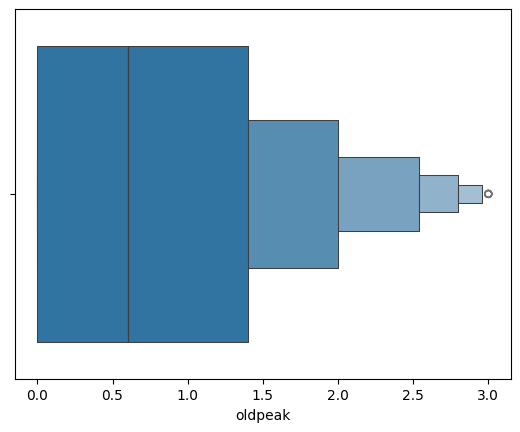

In [28]:
dh = dh[dh["oldpeak"] <=3]

sn.boxenplot(x ="oldpeak",data=dh)

plt.show()

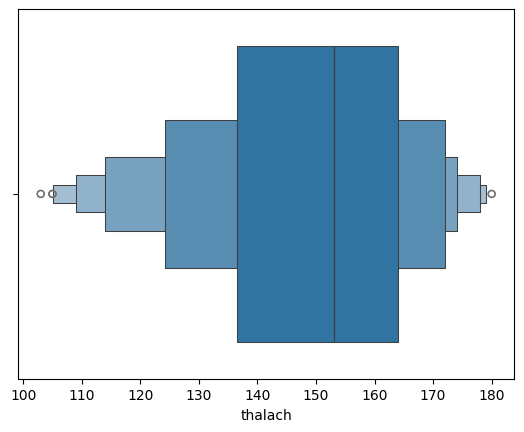

In [29]:
dh = dh[dh["thalach"] <= 180]
dh = dh[dh["thalach"] >= 100]

sn.boxenplot(x ="thalach",data=dh)

plt.show()

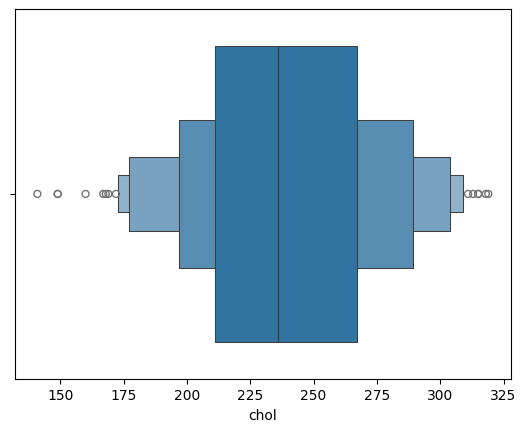

In [30]:
dh = dh[dh["chol"] <= 320]
dh = dh[dh["chol"] >= 140]

sn.boxenplot(x ="chol",data=dh)
plt.show()

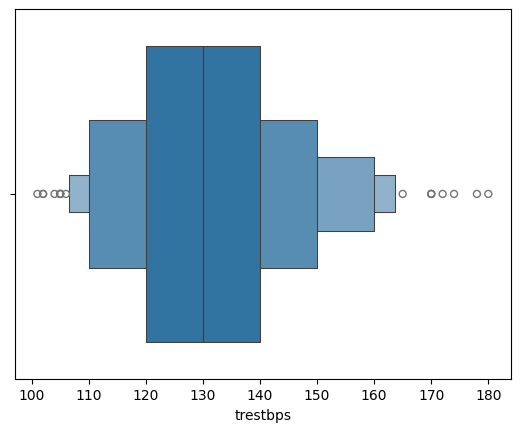

In [31]:
dh = dh[dh["trestbps"] <= 180]
dh = dh[dh["trestbps"] > 100]
sn.boxenplot(x ="trestbps",data=dh)
plt.show()

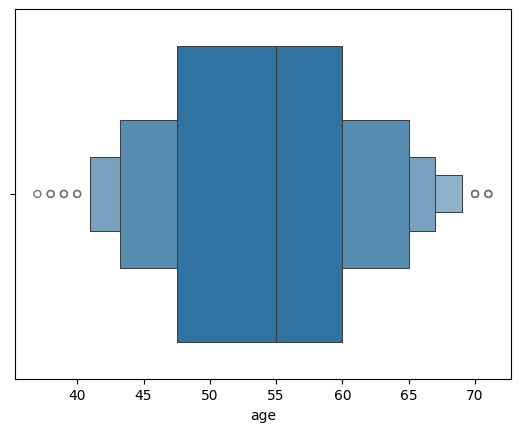

In [32]:
dh = dh[dh["age"] <= 72]
dh = dh[dh["age"] > 35]
sn.boxenplot(x ="age",data=dh)
plt.show()

In [34]:
dh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       227 non-null    int64  
 1   sex       227 non-null    int64  
 2   cp        227 non-null    int64  
 3   trestbps  227 non-null    int64  
 4   chol      227 non-null    int64  
 5   fbs       227 non-null    int64  
 6   restecg   227 non-null    int64  
 7   thalach   227 non-null    int64  
 8   exang     227 non-null    int64  
 9   oldpeak   227 non-null    float64
 10  slope     227 non-null    int64  
 11  ca        227 non-null    int64  
 12  thal      227 non-null    int64  
 13  target    227 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.6 KB


In [35]:
x = dh.drop(columns="target",axis=1)

y=dh["target"]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x = scalar.fit_transform(x)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
randomstate = 0
best_score = 0
for randomstate in range(1, 1001):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2, random_state=randomstate, stratify=y
    )
    clasifirer = LogisticRegression()
    clasifirer.fit(x_train, y_train)
    accuracyScoe_x_test = clasifirer.predict(x_test)
    score = accuracy_score(accuracyScoe_x_test, y_test)
    if score > best_score:
        best_score = score
        best_randomstate = randomstate
print(f"best random state:{best_randomstate}")
print(f"best score:{best_score * 100}")

best random state:161
best score:93.47826086956522


In [38]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2, random_state=161, stratify=y
    )
clasifirer = LogisticRegression()
clasifirer.fit(x_train, y_train)

LogisticRegression()

In [39]:
import pickle
with open("Hear2.sav","wb") as f:
    pickle.dump(clasifirer,f)